figures/macro_pr_vs_threshold_spider_bird_compact.png


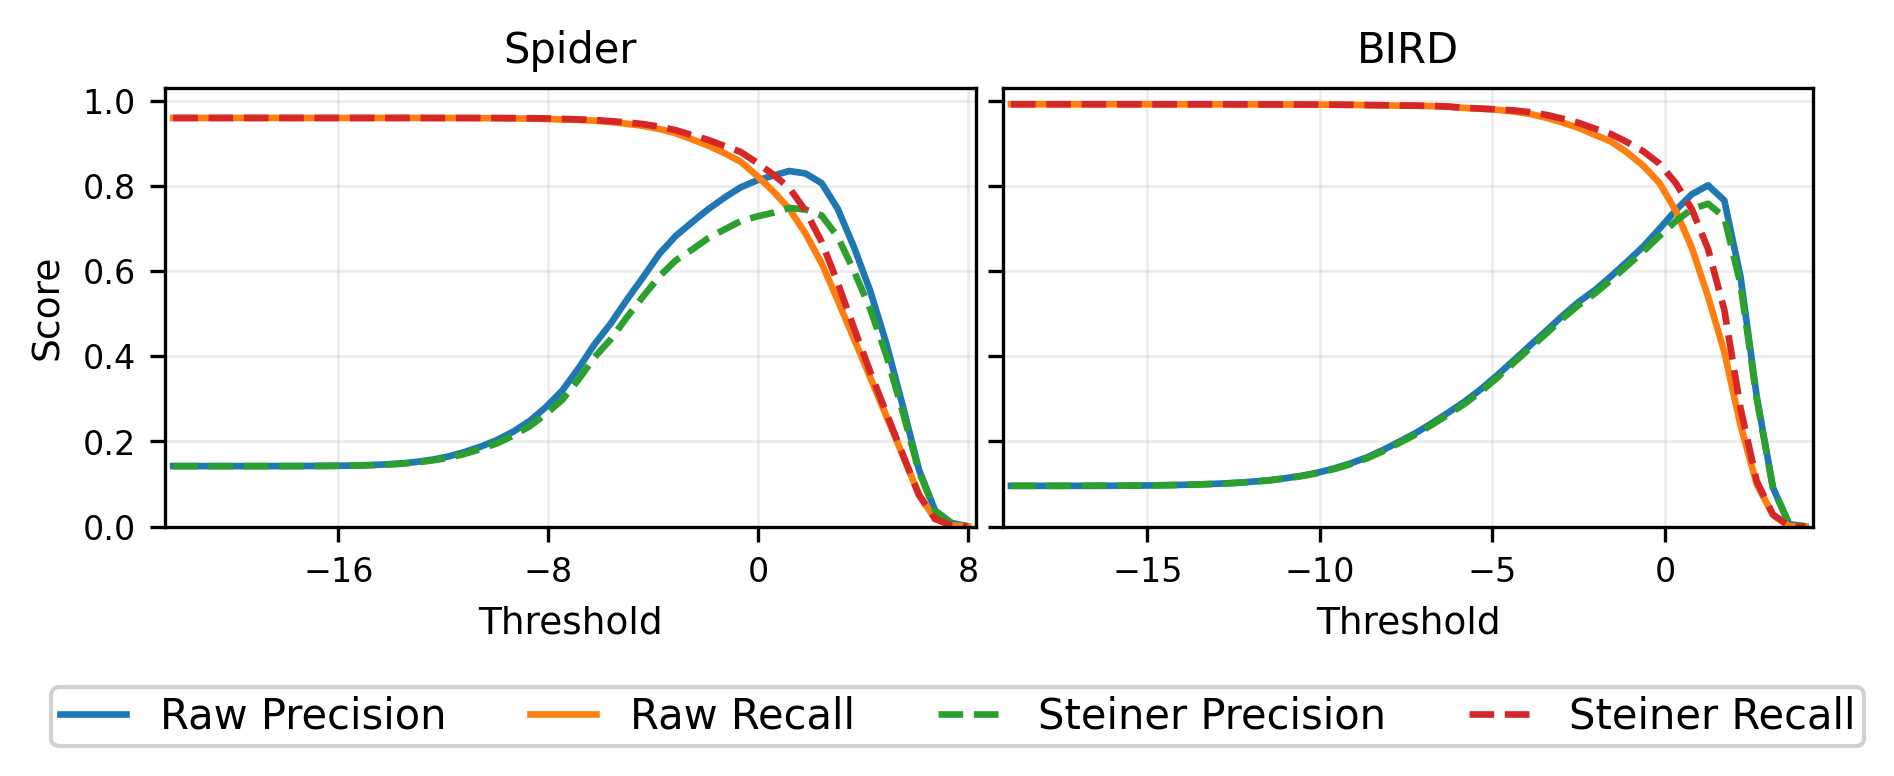

In [1]:
# Spider & BIRD macro PR-vs-threshold with fewer xticks and horizontal bottom legend
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from pathlib import Path

spider_csv = Path("/home/datht/graph-schema/logs/spider_dev_qwen_end2end/macro_threshold_curve.csv")
bird_csv   = Path("/home/datht/graph-schema/logs/bird_dev_qwen_end2end/macro_threshold_curve.csv")

df_spider = pd.read_csv(spider_csv)
df_bird   = pd.read_csv(bird_csv)

plt.rcParams.update({
    "font.size": 10,
    "axes.titlesize": 10,
    "axes.labelsize": 9,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "legend.fontsize": 8,
})

fig, axes = plt.subplots(1, 2, figsize=(6, 3), dpi=300, sharey=True)

def plot_panel(ax, df, title):
    l1, = ax.plot(df["threshold"], df["prec_raw"], linewidth=1.6, label="Raw Precision")
    l2, = ax.plot(df["threshold"], df["rec_raw"],  linewidth=1.6, label="Raw Recall")
    l3, = ax.plot(df["threshold"], df["prec_st"],  linewidth=1.6, linestyle="--", label="Steiner Precision")
    l4, = ax.plot(df["threshold"], df["rec_st"],   linewidth=1.6, linestyle="--", label="Steiner Recall")
    ax.set_title(title)
    ax.set_xlabel("Threshold")
    ax.grid(alpha=0.25, linewidth=0.6)
    ax.margins(x=0.01, y=0.05)
    ax.set_ylim(0.0, 1.03)
    # Fewer x-ticks
    ax.xaxis.set_major_locator(mticker.MaxNLocator(nbins=5, prune=None))
    return [l1, l2, l3, l4]

handles = plot_panel(axes[0], df_spider, "Spider")
_       = plot_panel(axes[1], df_bird,   "BIRD")
axes[0].set_ylabel("Score")

# One horizontal legend at the bottom
labels = [h.get_label() for h in handles]
fig.legend(
    handles, labels,
    loc="lower center",
    ncol=4,                # horizontal: 4 entries on one line
    fontsize=10,
    frameon=True, framealpha=0.9, borderpad=0.2, handlelength=1.6,
    bbox_to_anchor=(0.52, 0.05)
)

# Reserve space for legend
fig.tight_layout(pad=0.2, rect=[0, 0.18, 1, 1])

# shrink axes height to 80%
for ax in axes:
    box = ax.get_position()
    ax.set_position((box.x0, box.y0, box.width, box.height*0.8))

outdir = Path("figures"); outdir.mkdir(parents=True, exist_ok=True)
png = outdir / "macro_pr_vs_threshold_spider_bird_compact.png"
# pdf = outdir / "macro_pr_vs_threshold_spider_bird_compact.pdf"
fig.savefig(png, bbox_inches="tight", pad_inches=0.02)
# fig.savefig(pdf, bbox_inches="tight", pad_inches=0.02)
# print(png, pdf)
print(png)
